In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from encodings.aliases import aliases # to get the list of all available encodings

#Set matplotlib to diplay plots inline in the notebook
%matplotlib inline

### Read csv file and remove duplicates

In [2]:
## df = pd.read_csv('crime.csv') this line did not work because the file is encoded in a different format
## we need to find the correct encoding to read the file

alias_values = set(aliases.values())

for encoding in alias_values:
    try:
        crime = pd.read_csv('crime.csv', encoding=encoding)
        print('File read successfully using encoding: ', encoding)
        break
    except:
        pass

File read successfully using encoding:  cp855


In [3]:
# Get initial view of the data and its structure
crime.head() 

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
# Check the dimensions to understand size and scope
crime.shape 

(319073, 17)

In [5]:
# Check for duplicate rows in the data
crime.duplicated().sum() 

np.int64(23)

In [6]:
# Drop duplicate rows to ensure data integrity and avoiding double counting.
crime.drop_duplicates(inplace=True)

In [7]:
# Confirimng that the duplicate rows have been dropped
crime.shape

(319050, 17)

### Explore Data

In [8]:
# Get a comprehensive summary of the dataset structure
# This helps us understand the data types, non-null counts, and potential missing values
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [9]:
# Convert OCCURRED_ON_DATE to datetime type for easier date-based analysis
crime.OCCURRED_ON_DATE = pd.to_datetime(crime.OCCURRED_ON_DATE)

In [10]:
# Verify the change in data type for OCCURRED_ON_DATE
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET             

In [11]:
# Generate summary statistics for numerical columns
# This gives us an overview of the distribution of numerical data
crime.describe()

,OFFENSE_CODE,OCCURRED_ON_DATE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2017-01-25 12:35:59.149211904,2016.560674,6.609622,13.118176,42.214373,-70.908260
min,111.000000,2015-06-15 00:00:00,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016-04-12 03:30:00,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017-01-28 04:36:00,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017-11-05 18:39:00,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018-09-03 21:25:00,2018.000000,12.000000,23.000000,42.395042,-1.000000
std,1185.308921,NaN,0.996312,3.273677,6.294258,2.159845,3.493746


In [12]:
# Generate summary statistics for object (categorical) columns
# This helps us understand the frequency and uniqueness of categorical data
crime.describe(include='object')

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [13]:
# Identify columns without missing values
# These columns may be more reliable for immediate analysis
crime.columns[np.sum(crime.isnull()) == 0]

c:\Users\Home\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [14]:
# Check for the number of unique values in each column
for col in crime.columns:
    print(col, crime[col].nunique())

INCIDENT_NUMBER 282517
OFFENSE_CODE 222
OFFENSE_CODE_GROUP 67
OFFENSE_DESCRIPTION 244
DISTRICT 12
REPORTING_AREA 879
SHOOTING 1
OCCURRED_ON_DATE 233229
YEAR 4
MONTH 12
DAY_OF_WEEK 7
HOUR 24
UCR_PART 4
STREET 4657
Lat 18178
Long 18178
Location 18194


### Analyze the distribution of offense types

In [15]:
# What are the most common and uncommon crimes in terms of offense code group?
# This helps us understand the prevalence of different types of crimes
crime.OFFENSE_CODE_GROUP.value_counts() 

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: count, Length: 67, dtype: int64

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Drug Violation                     0.051857
Simple Assault                     0.049604
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: count, dtype: float64

Text(0.5, 1.0, 'Top 10 Offense Groups (as % of all crimes)')

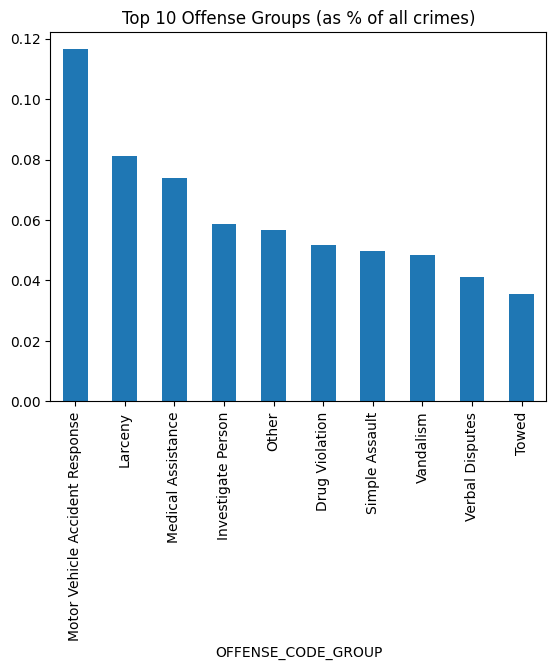

In [16]:
# Display the top 10 offense groups as a percentage of all offenses
# This gives us a clearer picture of the most significant crime categories

offense_group_counts = crime.OFFENSE_CODE_GROUP.value_counts()[:10] # Slice the top 10 offense groups

display(offense_group_counts / crime.shape[0]) 

# A bar chart provides a clear visual comparison
(offense_group_counts / crime.shape[0]).plot(kind='bar')
plt.title('Top 10 Offense Groups (as % of all crimes)')

In [17]:
# Analyze the least common offense groups
# This helps identify rare or unusual crime types
crime.OFFENSE_CODE_GROUP.value_counts().tail(10).sort_values(ascending=True)  

OFFENSE_CODE_GROUP
Biological Threat                             2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Burglary - No Property Taken                  2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Manslaughter                                  8
Gambling                                      8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: count, dtype: int64

In [18]:
# Examine the distribution of specific offense descriptions
# This provides a more detailed view of crime types than the broader offense groups
crime.OFFENSE_DESCRIPTION.value_counts() 

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON                  18783
INVESTIGATE PERSON                             18753
M/V - LEAVING SCENE - PROPERTY DAMAGE          16323
VANDALISM                                      15153
ASSAULT SIMPLE - BATTERY                       14791
                                               ...  
B&E RESIDENCE DAY - NO FORCE                       1
ROBBERY - UNARMED - BUSINESS                       1
B&E NON-RESIDENCE NIGHT - FORCE                    1
PROSTITUTE - COMMON NIGHTWALKER                    1
DRUGS - POSS CLASS D - INTENT MFR DIST DISP        1
Name: count, Length: 244, dtype: int64

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON            0.058872
INVESTIGATE PERSON                       0.058778
M/V - LEAVING SCENE - PROPERTY DAMAGE    0.051161
VANDALISM                                0.047494
ASSAULT SIMPLE - BATTERY                 0.046360
VERBAL DISPUTE                           0.041056
TOWED MOTOR VEHICLE                      0.035377
INVESTIGATE PROPERTY                     0.034866
LARCENY THEFT FROM BUILDING              0.028425
THREATS TO DO BODILY HARM                0.028340
Name: count, dtype: float64

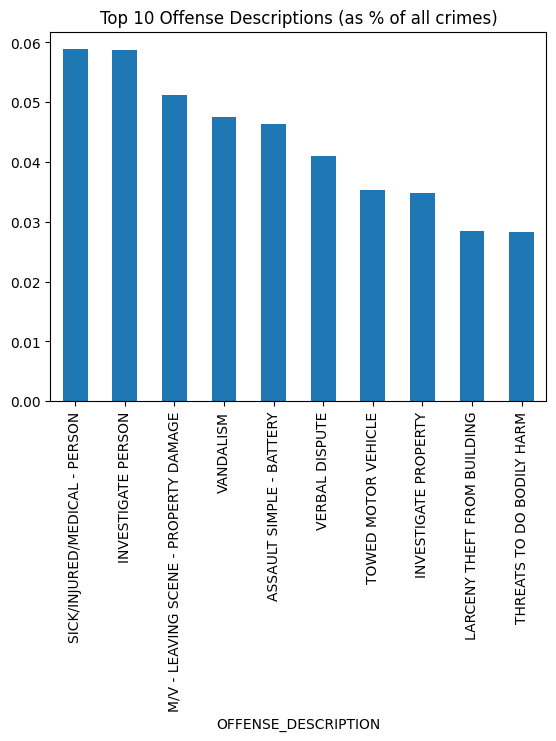

In [19]:
# Focus on the top 10 most common offense descriptions
# This helps identify the most frequent specific crime types
offense_description_counts = crime.OFFENSE_DESCRIPTION.value_counts()[:10] 


# Display the percentage of each top offense description
# This shows the relative frequency of the most common specific crimes
display(offense_description_counts / crime.shape[0]) 

# Visualize the top 10 offense descriptions as a percentage of all crimes
(offense_description_counts / crime.shape[0]).plot(kind='bar');
plt.title ('Top 10 Offense Descriptions (as % of all crimes)');

### Analyze crime trends over time

Text(0.5, 1.0, 'Number of crimes')

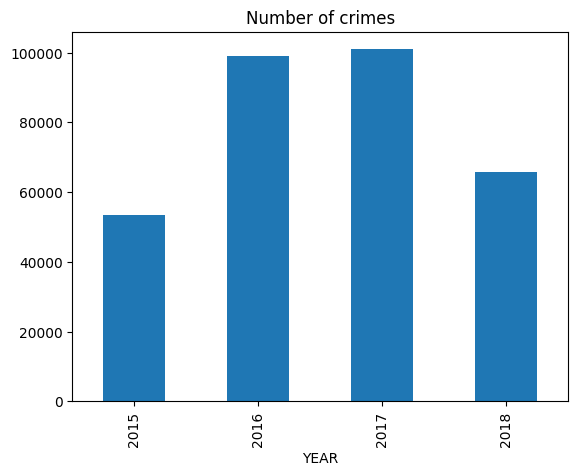

In [20]:
# Visualize the number of crimes per year
# This helps identify any long-term trends or significant year-to-year changes
crime.groupby('YEAR').count()['INCIDENT_NUMBER'].plot(kind='bar');
plt.title('Number of crimes') 


DAY_OF_WEEK
Friday       48489
Wednesday    46727
Thursday     46655
Tuesday      46376
Monday       45674
Saturday     44816
Sunday       40313
Name: INCIDENT_NUMBER, dtype: int64

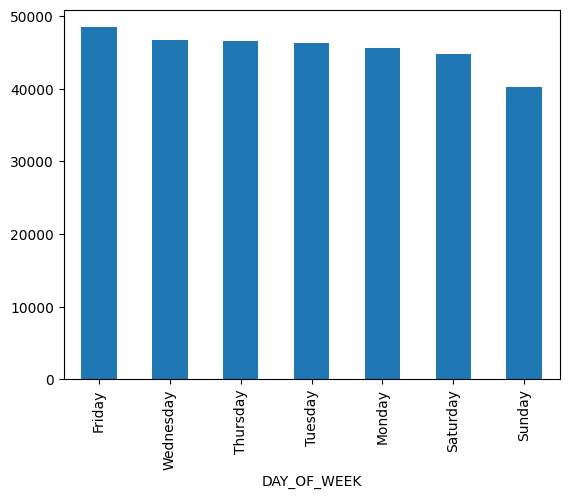

In [21]:
# Analyze crime patterns by day of the week
# This can reveal whether certain days are more prone to criminal activity
display(crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False)) # Display the number of incidents per year

# Visualize crime frequency by day of the week
crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False).plot(kind='bar');


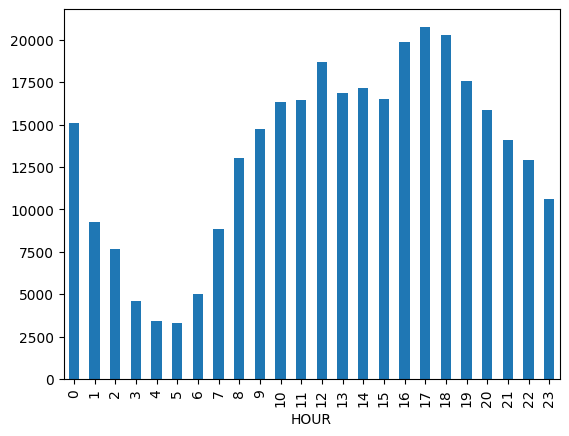

In [22]:
# Analyze crime patterns by hour of the day
# This can reveal whether certain times of day are more prone to criminal activity
crime.groupby('HOUR').count()['INCIDENT_NUMBER'].plot(kind='bar');

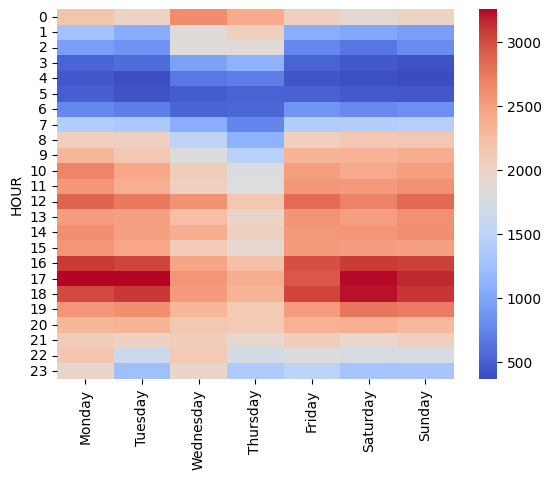

In [23]:
# Create a heatmap of crimes by day of week and hour

weekday_and_hour = crime.groupby(['HOUR', 'DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

weekday_and_hour.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.heatmap(weekday_and_hour, cmap='coolwarm');

In [24]:
# In which months were the number of crimes below average?
crime.groupby('MONTH').count()['INCIDENT_NUMBER']

MONTH
1     23608
2     21652
3     24146
4     24086
5     26199
6     30565
7     34553
8     34821
9     26539
10    25733
11    23675
12    23473
Name: INCIDENT_NUMBER, dtype: int64

In [25]:
# In which months were the number of crimes above average? 
# In which months on average did the most crimes occur? 

avg_crime = crime.groupby(['YEAR', 'MONTH']).count()['INCIDENT_NUMBER'].mean()
print("The average number of crimes is " + str(avg_crime))

year_and_month = crime.groupby(['MONTH', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

year_and_month.index = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

def style_negative(v, props=''):
    return props if v < avg_crime else None
styled_year_and_month = year_and_month.style.map(style_negative, props='color:blue;')\
              .map(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
styled_year_and_month.apply(highlight_max, props='color:white;background-color:darkgreen', axis=0)

styled_year_and_month

The average number of crimes is 7976.25


YEAR,2015,2016,2017,2018
Jan,nan,7835.000000,7991.000000,7782.000000
Feb,nan,7307.000000,7408.000000,6937.000000
March,nan,8199.000000,8179.000000,7768.000000
April,nan,8101.000000,8069.000000,7916.000000
May,nan,8578.000000,8715.000000,8906.000000
June,4188.000000,8558.000000,8985.000000,8834.000000
July,8322.000000,8618.000000,9075.000000,8538.000000
Aug,8340.000000,8938.000000,9206.000000,8337.000000
Sept,8411.000000,8521.000000,8940.000000,667.000000
Oct,8305.000000,8582.000000,8846.000000,nan


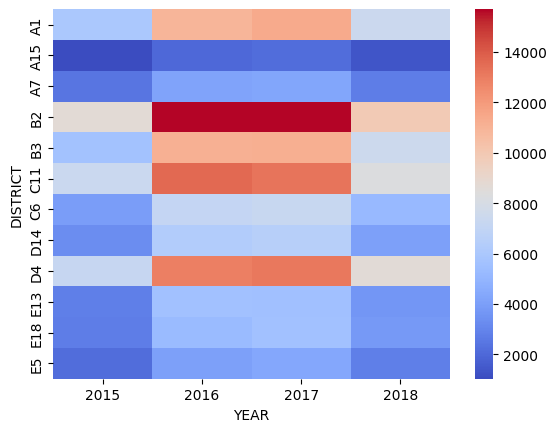

In [26]:
# In which districts were the most crimes committed on yearly basis?

district_year = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

sns.heatmap(district_year, cmap='coolwarm');